In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df=pd.read_csv("DelayedFlights.csv")
df2= pd.read_csv("routes.csv")

Merge Datasets

In [30]:
df.columns = df.columns.str.strip()
df2.columns = df2.columns.str.strip()
df2 = df2.rename(columns={'destination apirport': 'destination airport'})

merged_df = pd.merge(df, df2, left_on=['Origin', 'Dest'], right_on=['source airport', 'destination airport'])
merged_df.drop(columns=['source airport', 'destination airport','Unnamed: 0' ], inplace=True)

Limpieza de datos

Borrar los datos no completos. 
inplace = True; Reescribir ese resultado de eliminar esas filas en el set original

In [31]:
merged_df.dropna(inplace= True) # Datos faltantes, se eliminan las filas que les faltan datos
print(merged_df.columns)
print(merged_df.info())

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'airline', 'airline ID', 'source airport id', 'destination airport id',
       'codeshare', 'stops', 'equipment'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1591112 entries, 6 to 5731894
Data columns (total 36 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Year                    1591112 non-null  int64  
 1   Month                   1591112 non-null  int64  
 2   DayofMonth              1591112 non-null  int64  
 3   DayOfWeek               1591112 no

Columnas irrelevantes

In [32]:
# conteo de los niveles en columnas categoricas
cols_cat = merged_df.select_dtypes(include=['object']).columns
for col in cols_cat:
    print(f'Columna {col}: {merged_df[col].nunique()} subniveles')


Columna UniqueCarrier: 20 subniveles
Columna TailNum: 5306 subniveles
Columna Origin: 253 subniveles
Columna Dest: 256 subniveles
Columna CancellationCode: 1 subniveles
Columna airline: 36 subniveles
Columna airline ID: 36 subniveles
Columna source airport id: 253 subniveles
Columna destination airport id: 256 subniveles
Columna codeshare: 1 subniveles
Columna equipment: 592 subniveles


Todas las columnas tienen mas de 1 subnivel, no se elimina ninguna

In [33]:
merged_df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,stops
count,1591112.0,1.591112e+06,1.591112e+06,1.591112e+06,1.591112e+06,1.591112e+06,1.591112e+06,1.591112e+06,1.591112e+06,1.591112e+06,...,1.591112e+06,1.591112e+06,1591112.0,1591112.0,1.591112e+06,1.591112e+06,1.591112e+06,1.591112e+06,1.591112e+06,1591112.0
mean,2008.0,6.236382e+00,1.578892e+01,4.011955e+00,1.564344e+03,1.493522e+03,1.621316e+03,1.650906e+03,2.409372e+03,1.241910e+02,...,8.020191e+00,2.145858e+01,0.0,0.0,1.872978e+01,3.685080e+00,1.620532e+01,6.594382e-02,2.487760e+01,0.0
std,0.0,3.540196e+00,8.798126e+00,1.999221e+00,4.554167e+02,4.212295e+02,5.725468e+02,4.502483e+02,2.082276e+03,6.095214e+01,...,6.564247e+00,1.665652e+01,0.0,0.0,4.190176e+01,2.104707e+01,3.531197e+01,1.919779e+00,4.184412e+01,0.0
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.700000e+01,...,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.233000e+03,1.155000e+03,1.327000e+03,1.338000e+03,6.780000e+02,8.200000e+01,...,4.000000e+00,1.200000e+01,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.621000e+03,1.530000e+03,1.732000e+03,1.715000e+03,1.624000e+03,1.120000e+02,...,6.000000e+00,1.700000e+01,0.0,0.0,1.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,7.000000e+00,0.0
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.927000e+03,1.835000e+03,2.048000e+03,2.020000e+03,4.241000e+03,1.460000e+02,...,9.000000e+00,2.500000e+01,0.0,0.0,2.100000e+01,0.000000e+00,1.600000e+01,0.000000e+00,3.200000e+01,0.0
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.359000e+03,9.740000e+03,1.114000e+03,...,2.400000e+02,4.220000e+02,0.0,0.0,1.542000e+03,1.352000e+03,1.137000e+03,3.920000e+02,1.316000e+03,0.0


In [34]:
merged_df = merged_df.drop(['Year', 'Cancelled', 'Diverted', 'stops'], axis=1)
merged_df.describe()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.591112e+06,1.591112e+06,1.591112e+06,1.591112e+06,1.591112e+06,1.591112e+06,1.591112e+06,1.591112e+06,1.591112e+06,1.591112e+06,...,1.591112e+06,1.591112e+06,1.591112e+06,1.591112e+06,1.591112e+06,1.591112e+06,1.591112e+06,1.591112e+06,1.591112e+06,1.591112e+06
mean,6.236382e+00,1.578892e+01,4.011955e+00,1.564344e+03,1.493522e+03,1.621316e+03,1.650906e+03,2.409372e+03,1.241910e+02,1.196822e+02,...,6.356373e+01,5.905497e+01,6.345324e+02,8.020191e+00,2.145858e+01,1.872978e+01,3.685080e+00,1.620532e+01,6.594382e-02,2.487760e+01
std,3.540196e+00,8.798126e+00,1.999221e+00,4.554167e+02,4.212295e+02,5.725468e+02,4.502483e+02,2.082276e+03,6.095214e+01,5.767048e+01,...,5.949536e+01,5.821166e+01,4.581757e+02,6.564247e+00,1.665652e+01,4.190176e+01,2.104707e+01,3.531197e+01,1.919779e+00,4.184412e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.700000e+01,-2.100000e+01,...,1.500000e+01,6.000000e+00,5.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,8.000000e+00,2.000000e+00,1.233000e+03,1.155000e+03,1.327000e+03,1.338000e+03,6.780000e+02,8.200000e+01,8.000000e+01,...,2.600000e+01,2.300000e+01,3.350000e+02,4.000000e+00,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.000000e+00,1.600000e+01,4.000000e+00,1.621000e+03,1.530000e+03,1.732000e+03,1.715000e+03,1.624000e+03,1.120000e+02,1.090000e+02,...,4.300000e+01,4.000000e+01,5.470000e+02,6.000000e+00,1.700000e+01,1.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,7.000000e+00
75%,9.000000e+00,2.300000e+01,6.000000e+00,1.927000e+03,1.835000e+03,2.048000e+03,2.020000e+03,4.241000e+03,1.460000e+02,1.400000e+02,...,8.000000e+01,7.500000e+01,7.480000e+02,9.000000e+00,2.500000e+01,2.100000e+01,0.000000e+00,1.600000e+01,0.000000e+00,3.200000e+01
max,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.359000e+03,9.740000e+03,1.114000e+03,5.330000e+02,...,1.542000e+03,1.545000e+03,4.502000e+03,2.400000e+02,4.220000e+02,1.542000e+03,1.352000e+03,1.137000e+03,3.920000e+02,1.316000e+03


Filas Repetidas

In [35]:
print(f'Tamaño:{merged_df.shape} ')
merged_df.drop_duplicates(inplace=True)
print(f'Tamaño:{merged_df.shape} ')


Tamaño:(1591112, 32) 
Tamaño:(1591110, 32) 


Outliers carables numericas (valores extremos)

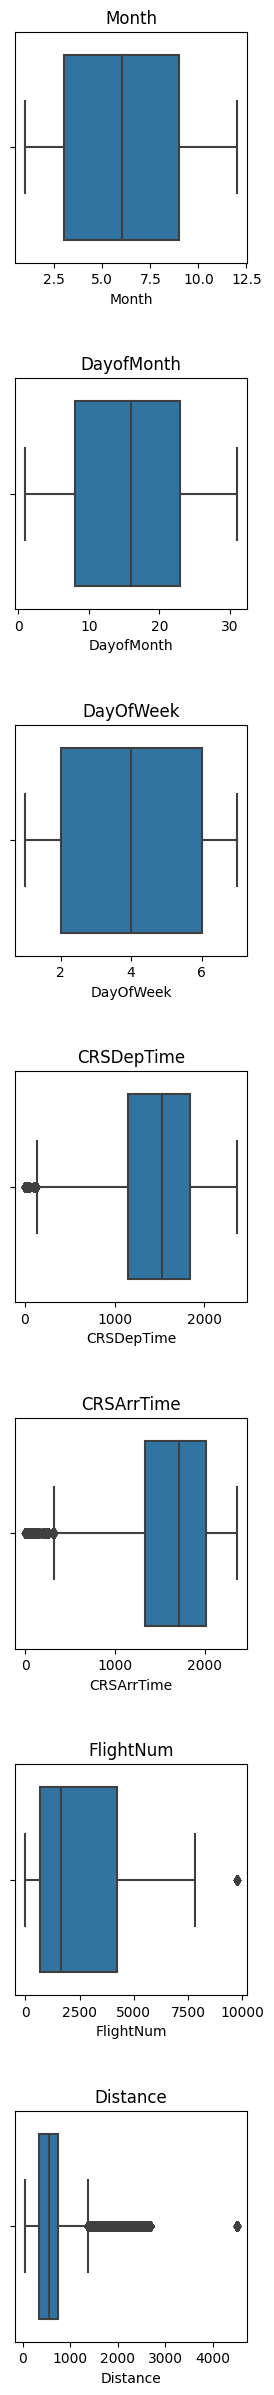

In [39]:
cols_num = merged_df.select_dtypes(include=['int64']).columns
fig, ax = plt.subplots(nrows =7, ncols=1, figsize=( 3,30))
fig.subplots_adjust(hspace=0.5)
for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=merged_df, ax= ax[i])
    ax[i].set_title(col)

Errores tipograficos en variabels type object

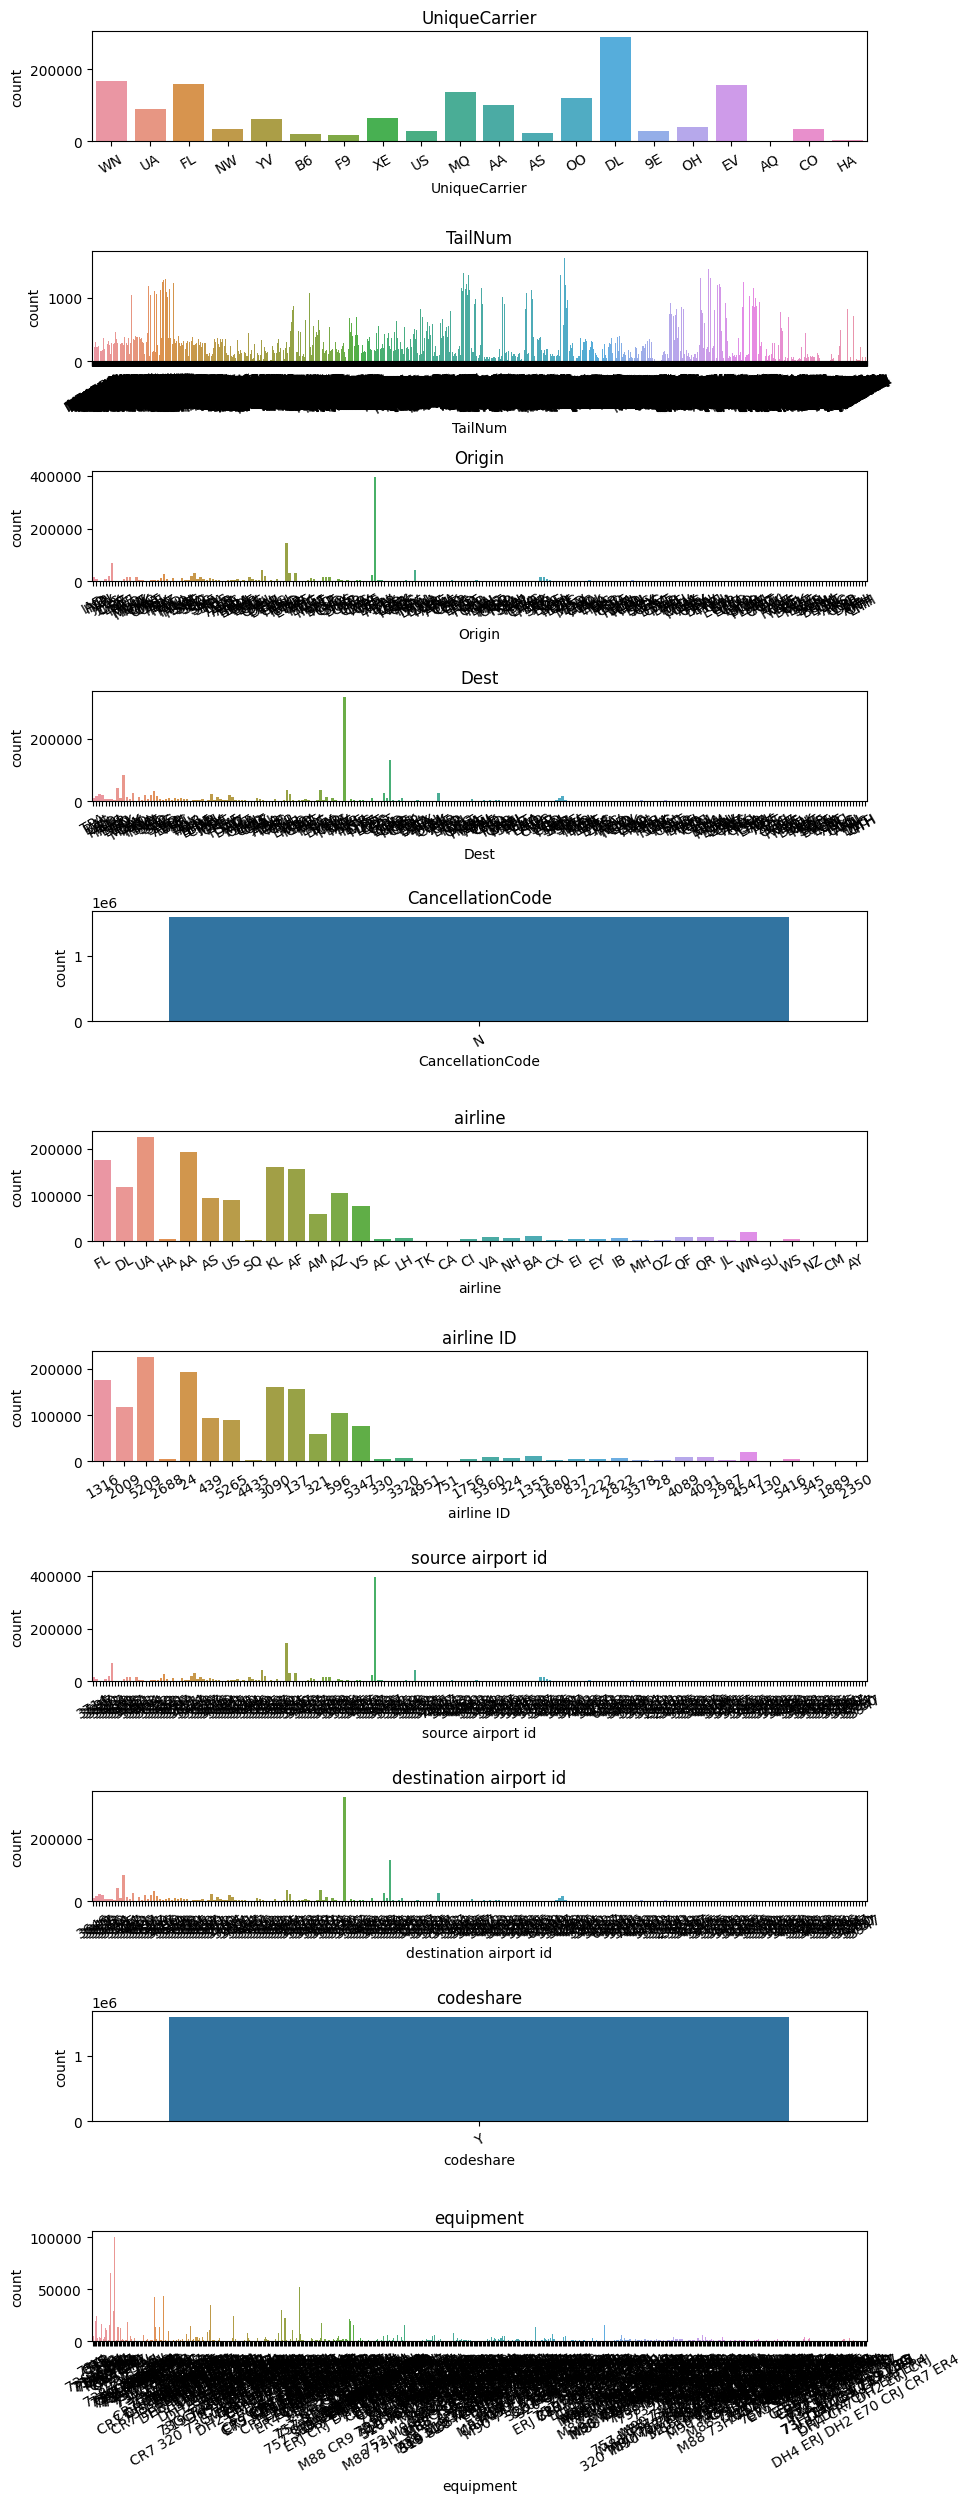

In [41]:
cols_cat = merged_df.select_dtypes(include=['object']).columns
fig, ax = plt.subplots(nrows=11, ncols= 1, figsize=(10,30))
fig.subplots_adjust(hspace=1)
for i,col in enumerate(cols_cat):
     sns.countplot(x=col, data= merged_df, ax=ax[i])
     ax[i].set_title(col)
     ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)

In [43]:
merged_df.to_csv("FlightsDatabase.csv", index=False)